In [ ]:
! gdown <id>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_json('/content/games_metadata.json')

In [ ]:
df = df[df['description'] != ''].copy()

In [ ]:
len(df)

39346

Попробуем предсказать 2 тега

Создадим целевые переменные

In [ ]:
def action_in_tag_list(row):
    return ('Action' in list(row['tags'])) * 1

In [ ]:
def cute_in_tag_list(row):
    return ('Cute' in list(row['tags'])) * 1

In [ ]:
df['action'] = df.apply(action_in_tag_list,axis=1)

In [ ]:
df['cute'] = df.apply(cute_in_tag_list,axis=1)

In [ ]:
df['action'].value_counts()

0    22060
1    17286
Name: action, dtype: int64

In [ ]:
df['cute'].value_counts()

0    34016
1     5330
Name: cute, dtype: int64

In [ ]:
df.groupby(['action','cute'])['app_id'].agg('count')

action  cute
0       0       18594
        1        3466
1       0       15422
        1        1864
Name: app_id, dtype: int64

Создадим переменную для будущей стратификации данных при разделении на train, val, test

In [ ]:
def action_cute(row):
    return str(row['action']) + str(row['cute'])

In [ ]:
df['action_cute'] = df.apply(action_cute,axis=1)

In [ ]:
df

,app_id,description,tags,action,cute,action_cute
0,10090,"Call of Duty is back, redefining war like you'...","[Zombies, World War II, FPS, Multiplayer, Acti...",1,0,10
1,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre...",1,0,10
3,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St...",1,0,10
4,226560,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P...",1,0,10
5,249050,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra...",0,0,00
...,...,...,...,...,...,...
48313,1803600,Gone Rogue is a tactical stealth game with RPG...,"[Stealth, Action, Real Time Tactics, Isometric...",1,0,10
48314,1811990,"Take on the elements in Wildfrost, a tactical ...","[Card Battler, Difficult, Roguelike Deckbuilde...",0,0,00
48315,1868120,Competitive multiplayer match with vehicles an...,"[FPS, Third-Person Shooter, Multiplayer, Shoot...",1,0,10
48316,2206390,Feel the Neon in Your Bones! How would you lik...,"[3D Platformer, Rhythm, Parkour, 3D, Atmospher...",0,1,01


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df,train_size=0.6,random_state=42,stratify=df['action_cute'])
val, test = train_test_split(test,train_size=0.5,random_state=42,stratify=test['action_cute'])

In [ ]:
train['action_cute'].value_counts() / len(df)

00    0.283536
10    0.235170
01    0.052864
11    0.028415
Name: action_cute, dtype: float64

In [ ]:
len(train)

23607

In [ ]:
val['action_cute'].value_counts() / len(df)

00    0.094520
10    0.078382
01    0.017613
11    0.009480
Name: action_cute, dtype: float64

In [ ]:
len(val)

7869

In [ ]:
( val['action_cute'].value_counts() / len(df) ) * (len(train) / len(val))

00    0.283561
10    0.235145
01    0.052839
11    0.028440
Name: action_cute, dtype: float64

In [ ]:
test['action_cute'].value_counts() / len(df)

00    0.094520
10    0.078407
01    0.017613
11    0.009480
Name: action_cute, dtype: float64

In [ ]:
train_full = pd.concat([train,val])

https://github.com/catboost/tutorials/blob/master/classification/classification_tutorial.ipynb

In [ ]:
from copy import deepcopy

In [ ]:
df

,app_id,description,tags,action,cute,action_cute
0,10090,"Call of Duty is back, redefining war like you'...","[Zombies, World War II, FPS, Multiplayer, Acti...",1,0,10
1,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre...",1,0,10
3,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St...",1,0,10
4,226560,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P...",1,0,10
5,249050,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra...",0,0,00
...,...,...,...,...,...,...
48313,1803600,Gone Rogue is a tactical stealth game with RPG...,"[Stealth, Action, Real Time Tactics, Isometric...",1,0,10
48314,1811990,"Take on the elements in Wildfrost, a tactical ...","[Card Battler, Difficult, Roguelike Deckbuilde...",0,0,00
48315,1868120,Competitive multiplayer match with vehicles an...,"[FPS, Third-Person Shooter, Multiplayer, Shoot...",1,0,10
48316,2206390,Feel the Neon in Your Bones! How would you lik...,"[3D Platformer, Rhythm, Parkour, 3D, Atmospher...",0,1,01


Создадим функцию которая возвращает датасет в котором каждая строка размножена на кол-во вариантов комбинаций целевых переменных. Задается главная целевая переменная обозначающая верную комбинацию целевых переменных.

In [ ]:
def construct_multiclass_dataset(df, start_group_id):
  n = start_group_id
  df_new_category = []
  df_list = df.values
  for obj_idx in range(len(df_list)):
    obj = list(df_list[obj_idx])
    for label in [[0,0],[0,1],[1,0],[1,1]]:
      new_obj = deepcopy(obj)
      category = [int(new_obj[3]), int(new_obj[4])]
      if category == label:
        new_obj.append(1)
      else:
        new_obj.append(0)
      new_obj[3] = label[0]
      new_obj[4] = label[1]
      new_obj.append(n)
      df_new_category.append(new_obj)
    n+=1
  df_new_category = pd.DataFrame(df_new_category)
  df_new_category.columns = ['app_id', 'description', 'tags', 'action', 'cute', 'action_cute', 'value', 'group_id']
  return df_new_category


In [ ]:
train_multiclass = construct_multiclass_dataset(train,0)

In [ ]:
train_multiclass.head(20)

,app_id,description,tags,action,cute,action_cute,value,group_id
0,531180,Airheart is a dieselpunk airplane action rogue...,"[Action, Indie, Action Roguelike, Female Prota...",0,0,10,0,0
1,531180,Airheart is a dieselpunk airplane action rogue...,"[Action, Indie, Action Roguelike, Female Prota...",0,1,10,0,0
2,531180,Airheart is a dieselpunk airplane action rogue...,"[Action, Indie, Action Roguelike, Female Prota...",1,0,10,1,0
3,531180,Airheart is a dieselpunk airplane action rogue...,"[Action, Indie, Action Roguelike, Female Prota...",1,1,10,0,0
4,516940,"The famous ""Minesweeper"" is now in virtual rea...","[Indie, Casual, Simulation, Action, VR, Puzzle]",0,0,10,0,1
5,516940,"The famous ""Minesweeper"" is now in virtual rea...","[Indie, Casual, Simulation, Action, VR, Puzzle]",0,1,10,0,1
6,516940,"The famous ""Minesweeper"" is now in virtual rea...","[Indie, Casual, Simulation, Action, VR, Puzzle]",1,0,10,1,1
7,516940,"The famous ""Minesweeper"" is now in virtual rea...","[Indie, Casual, Simulation, Action, VR, Puzzle]",1,1,10,0,1
8,488360,Have you ever wished to be sitting next to a f...,"[Simulation, Adventure, Action, VR]",0,0,10,0,2
9,488360,Have you ever wished to be sitting next to a f...,"[Simulation, Adventure, Action, VR]",0,1,10,0,2


In [ ]:
len(train_multiclass) / len(train)

4.0

In [ ]:
train_multiclass['value'].value_counts()

0    70821
1    23607
Name: value, dtype: int64

In [ ]:
len(train)

23607

In [ ]:
val_multiclass = construct_multiclass_dataset(val,len(train))

In [ ]:
len(val_multiclass) / len(val)

4.0

Опрдеделим множества полей

In [ ]:
text_features = ['description']
X = ['description','action','cute']
y = ['value']
cat_features = ['action', 'cute']
group_ids = ['group_id']

Параметры модели

In [ ]:
params = {'verbose':100,
          'loss_function': 'MultiClass',
          'random_seed':42,
          'learning_rate':0.3}

In [ ]:
! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.3 MB/s eta 0:00:00


Пулы

In [ ]:
# Pool(ranking_matrix, ranking_labels, cat_features=final_cat_features, group_id = group_ids)

from catboost import Pool

train_data = Pool(data=train_multiclass[X],
                  label=train_multiclass[y],
                  text_features=text_features,
                  cat_features=cat_features,
                  group_id = train_multiclass[group_ids]
                 )

valid_data = Pool(data=val_multiclass[X],
                  label=val_multiclass[y],
                  text_features=text_features,
                  cat_features=cat_features,
                  group_id = val_multiclass[group_ids]
                 )

#test_data = Pool(data=test_multiclass[X],
#                 label=test_multiclass[y],
#                 text_features=text_features,
#                 group_id = test_multiclass[group_ids]
#                 )

#train_full_data = Pool(data=train_full_multiclass[X],
#                       label=train_full_multiclass[y],
#                       text_features=text_features,
#                       group_id = train_full_multiclass[group_ids]
#                       )

In [ ]:
from catboost import CatBoostClassifier

Модель

In [ ]:
model = CatBoostClassifier(**params)

Обучение

In [ ]:
model.fit(train_data,eval_set=valid_data)

0:	learn: 0.5665034	test: 0.6022757	best: 0.6022757 (0)	total: 919ms	remaining: 15m 17s
100:	learn: 0.3281150	test: 0.4262870	best: 0.4261677 (98)	total: 1m 33s	remaining: 13m 53s
200:	learn: 0.3134106	test: 0.4157267	best: 0.4157267 (200)	total: 3m 1s	remaining: 12m 3s
300:	learn: 0.3052862	test: 0.4128453	best: 0.4128388 (298)	total: 4m 30s	remaining: 10m 27s
400:	learn: 0.2988715	test: 0.4111292	best: 0.4111292 (400)	total: 5m 58s	remaining: 8m 54s
500:	learn: 0.2930701	test: 0.4097524	best: 0.4096377 (485)	total: 7m 25s	remaining: 7m 23s
600:	learn: 0.2882598	test: 0.4092524	best: 0.4091652 (594)	total: 8m 53s	remaining: 5m 53s
700:	learn: 0.2834757	test: 0.4084047	best: 0.4082712 (681)	total: 10m 19s	remaining: 4m 24s
800:	learn: 0.2788392	test: 0.4076281	best: 0.4075879 (797)	total: 11m 47s	remaining: 2m 55s
900:	learn: 0.2748283	test: 0.4073703	best: 0.4071453 (873)	total: 13m 15s	remaining: 1m 27s
999:	learn: 0.2707616	test: 0.4065938	best: 0.4065550 (995)	total: 14m 41s	remain

Оценим предсказания на val

In [ ]:
val_multiclass['pred_value'] = model.predict_proba(val_multiclass[X])[:,1]

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve

In [ ]:
val_multiclass.head(20)

,app_id,description,tags,action,cute,action_cute,value,group_id,pred_value
0,872180,Explore a fantastic world and see an enchantin...,"[Casual, Indie, Adventure, Puzzle]",0,0,00,1,23607,0.331606
1,872180,Explore a fantastic world and see an enchantin...,"[Casual, Indie, Adventure, Puzzle]",0,1,00,0,23607,0.075211
2,872180,Explore a fantastic world and see an enchantin...,"[Casual, Indie, Adventure, Puzzle]",1,0,00,0,23607,0.094289
3,872180,Explore a fantastic world and see an enchantin...,"[Casual, Indie, Adventure, Puzzle]",1,1,00,0,23607,0.022784
4,1595630,Underwater Life is an indie simulator game mad...,"[Casual, Simulation, Adventure, Arcade, Underw...",0,0,01,0,23608,0.612540
5,1595630,Underwater Life is an indie simulator game mad...,"[Casual, Simulation, Adventure, Arcade, Underw...",0,1,01,1,23608,0.060310
6,1595630,Underwater Life is an indie simulator game mad...,"[Casual, Simulation, Adventure, Arcade, Underw...",1,0,01,0,23608,0.393551
7,1595630,Underwater Life is an indie simulator game mad...,"[Casual, Simulation, Adventure, Arcade, Underw...",1,1,01,0,23608,0.040263
8,289600,"Marauder, is a squad based and tactical 3D gam...","[RPG, Strategy, Tactical, Survival, Post-apoca...",0,0,00,1,23609,0.471858
9,289600,"Marauder, is a squad based and tactical 3D gam...","[RPG, Strategy, Tactical, Survival, Post-apoca...",0,1,00,0,23609,0.024544


In [ ]:
fprs, tprs, thrs = roc_curve(val_multiclass['value'],val_multiclass['pred_value'])

In [ ]:
roc = pd.DataFrame({'fpr':fprs,'tpr':tprs,'thr':thrs})

Roc Auc curve

<Axes: xlabel='fpr'>

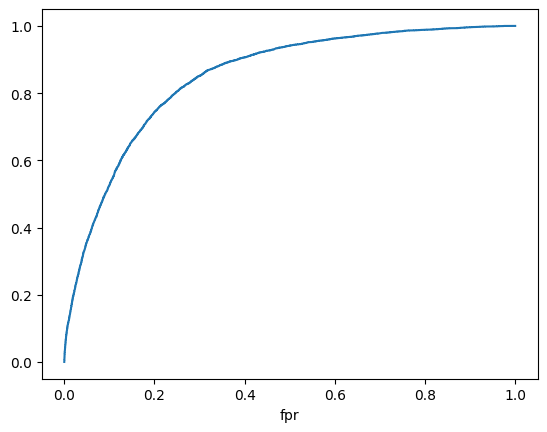

In [ ]:
roc.set_index('fpr')['tpr'].plot()

На параметрах полученных на train обучим train+val

In [ ]:
params = {'iterations': 996,
          'verbose':100,
          'loss_function': 'MultiClass',
          'random_seed':42,
          'learning_rate':0.3}

In [ ]:
train_full_multiclass = construct_multiclass_dataset(train_full,0)

In [ ]:
train_full_data = Pool(data=train_full_multiclass[X],
                       label=train_full_multiclass[y],
                       text_features=text_features,
                       group_id = train_full_multiclass[group_ids]
                       )

In [ ]:
model = CatBoostClassifier(**params)

In [ ]:
model.fit(train_full_data)

0:	learn: 0.5418438	total: 1.13s	remaining: 18m 45s
100:	learn: 0.2398747	total: 1m 50s	remaining: 16m 22s
200:	learn: 0.2294974	total: 3m 33s	remaining: 14m 5s
300:	learn: 0.2220152	total: 5m 16s	remaining: 12m 9s
400:	learn: 0.2158631	total: 6m 56s	remaining: 10m 17s
500:	learn: 0.2109956	total: 8m 37s	remaining: 8m 31s
600:	learn: 0.2070628	total: 10m 18s	remaining: 6m 46s
700:	learn: 0.2031805	total: 11m 57s	remaining: 5m 1s
800:	learn: 0.1996571	total: 13m 35s	remaining: 3m 18s
900:	learn: 0.1963404	total: 15m 14s	remaining: 1m 36s
995:	learn: 0.1933302	total: 16m 49s	remaining: 0us


Предсказания на test

In [ ]:
test_multiclass = construct_multiclass_dataset(test, len(train_full))

In [ ]:
test_multiclass['pred_value'] = model.predict_proba(test_multiclass[X])[:,1]

In [ ]:
fprs, tprs, thrs = roc_curve(test_multiclass['value'],test_multiclass['pred_value'])

In [ ]:
roc = pd.DataFrame({'fpr':fprs,'tpr':tprs,'thr':thrs})

Roc Auc curve

<Axes: xlabel='fpr'>

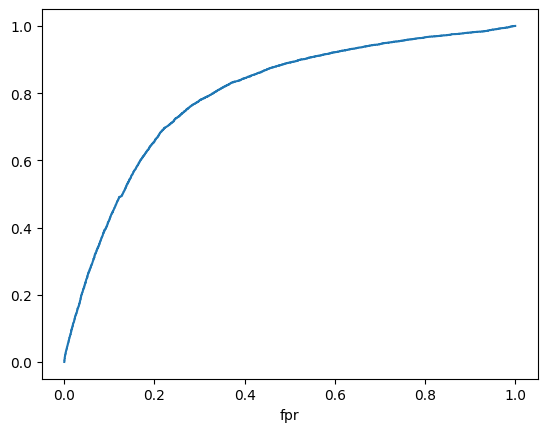

In [ ]:
roc.set_index('fpr')['tpr'].plot()

Выберем оптимальный порог

In [ ]:
thrs = [0] + list(test_multiclass['pred_value'].unique())

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
result = []
for thr in tqdm(thrs):
	test_multiclass['pred_value_thr'] = (test_multiclass['pred_value'] > thr) * 1
	result.append((thr,
		             f1_score(test_multiclass['value'],test_multiclass['pred_value_thr'])))

  0%|          | 0/30805 [00:00<?, ?it/s]

In [ ]:
t = pd.DataFrame(result,columns=['thr','f1'])

In [ ]:
t[t['f1'] == t['f1'].max()]

,thr,f1
24037,0.360307,0.589433


In [ ]:
test_multiclass['pred_value_res'] = (test_multiclass['pred_value'] > 0.338837) * 1

In [ ]:
from sklearn.metrics import classification_report

Результирующие метрики

In [ ]:
print(classification_report(test_multiclass['value'],test_multiclass['pred_value_res']))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82     23610
           1       0.50      0.71      0.59      7870

    accuracy                           0.75     31480
   macro avg       0.69      0.74      0.70     31480
weighted avg       0.79      0.75      0.76     31480

